In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.utils import plot_model

from sklearn.model_selection import train_test_split

import numpy as np
from matplotlib import pyplot as plt
import glob
import cv2

In [2]:
def prepare_data(mode):
    """ divides data into images and labels
        Min-Max scales images
    Params:
        mode : String (either "padded" or "resized")
    Returns:
        scaled_X : array with images
        y : array with corresponding labels
        (0 for non-IDC, 1 for IDC)
    """
    patches = glob.glob('./' + mode + '/*.png', recursive=True)
    class0 = []
    class1 = []
    for name in glob.glob('./' + mode + '/*class0.png', recursive=True):
        class0.append(name)
    for name in glob.glob('./' + mode + '/*class1.png', recursive=True):
        class1.append(name)
    X = []
    y = []
    for img_name in patches:
        image = cv2.imread(img_name)
        X.append(image)
        y.append(0) if img_name in class0 else y.append(1)
    scaled_X = np.array(X)/255.0
    return scaled_X, y

In [3]:
X_pad, y = prepare_data("padded")

In [4]:
X_pad_train, X_pad_test, y_pad_train, y_pad_test = train_test_split(X_pad, y, test_size=0.1, random_state=42)

In [35]:
y_pad_train_onehot = np_utils.to_categorical(y_pad_train, 2)
y_pad_test_onehot = np_utils.to_categorical(y_pad_test, 2)

In [41]:
def create_CNN():
    input_shape = (50, 50, 3)
    num_classes = 2
    
    model = Sequential()
    
    model.add(Conv2D(32, kernel_size=(3, 3), padding='same', input_shape=input_shape)) # strides=(1, 1) default
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #model.add(Dropout(0.2))
    
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #model.add(Dropout(0.2))
    
    model.add(Flatten())
    model.add(Dense(512))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [44]:
epochs = 20
batch_size = 128

cnn_pad = create_CNN()
cnn_pad.summary()
plot_model(cnn_pad, to_file='simple_cnn_model.png')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 50, 50, 32)        896       
_________________________________________________________________
batch_normalization_36 (Batc (None, 50, 50, 32)        128       
_________________________________________________________________
activation_36 (Activation)   (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 48, 48, 32)        9248      
_________________________________________________________________
batch_normalization_37 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
activation_37 (Activation)   (None, 48, 48, 32)        0         
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 24, 24, 32)        0         
__________

In [45]:
pad_fit = cnn_pad.fit(X_pad_train, y_pad_train_onehot,
          batch_size=batch_size,
          epochs=epochs, shuffle=True,
          verbose=1)

Epoch 1/20
9000/9000 [==============================] - 150s 17ms/step - loss: 0.3294 - acc: 0.8858
Epoch 2/20
9000/9000 [==============================] - 146s 16ms/step - loss: 0.1937 - acc: 0.9217
Epoch 3/20
9000/9000 [==============================] - 156s 17ms/step - loss: 0.1600 - acc: 0.9377
Epoch 4/20
9000/9000 [==============================] - 159s 18ms/step - loss: 0.1354 - acc: 0.9442
Epoch 5/20
9000/9000 [==============================] - 155s 17ms/step - loss: 0.1036 - acc: 0.9582
Epoch 6/20
9000/9000 [==============================] - 152s 17ms/step - loss: 0.0892 - acc: 0.9643
Epoch 7/20
9000/9000 [==============================] - 147s 16ms/step - loss: 0.0618 - acc: 0.9762
Epoch 8/20
9000/9000 [==============================] - 171s 19ms/step - loss: 0.0390 - acc: 0.9853
Epoch 9/20
9000/9000 [==============================] - 191s 21ms/step - loss: 0.0390 - acc: 0.9854
Epoch 10/20
9000/9000 [==============================] - 153s 17ms/step - loss: 0.0272 - acc: 0.9909

Test loss: 0.425748536006
Test accuracy: 0.925


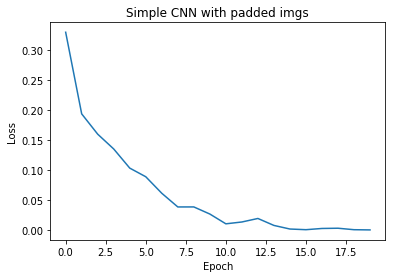

In [46]:
score_pad = cnn_pad.evaluate(X_pad_test, y_pad_test_onehot, verbose=0)
print('Test loss:', score_pad[0])
print('Test accuracy:', score_pad[1])

plt.plot(pad_fit.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Simple CNN with padded imgs')
plt.show()

In [ ]:
# for comparison with resized imgs
X_inter, _ = prepare_data("resized")
X_inter_train, X_inter_test, y_inter_train, y_inter_test = train_test_split(X_inter, y, test_size=0.1, random_state=42)
y_inter_train_onehot = np_utils.to_categorical(y_inter_train, 2)
y_inter_test_onehot = np_utils.to_categorical(y_inter_test, 2)

cnn_inter = create_CNN()
inter_fit = cnn_inter.fit(X_inter_train, y_inter_train_onehot,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1)

In [ ]:
score_inter = cnn_inter.evaluate(X_inter_test, y_inter_test_onehot, verbose=0)
print('Test accuracy:', score_inter[1])

plt.plot(inter_fit.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Simple CNN with interpolated imgs')
plt.show()